<a href="https://colab.research.google.com/github/akshaytripathi09/Students-Academic-Performance/blob/main/Students_Academics_Performance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORT LIBRARIES.
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

sns.set()

In [ ]:
data = pd.read_csv('xAPI-Edu-Data.csv')

<Axes: xlabel='Semester', ylabel='count'>

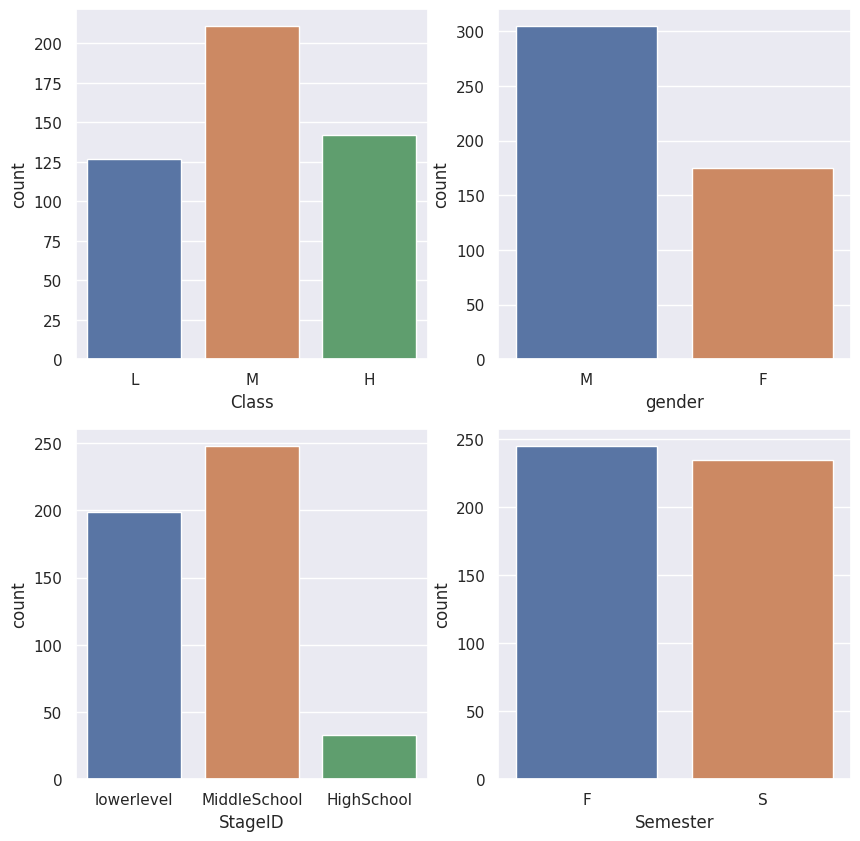

In [ ]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Class', data=data, ax=axarr[0,0], order=['L','M','H'])
sns.countplot(x='gender', data=data, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='StageID', data=data, ax=axarr[1,0])
sns.countplot(x='Semester', data=data, ax=axarr[1,1])

<Axes: xlabel='NationalITy', ylabel='count'>

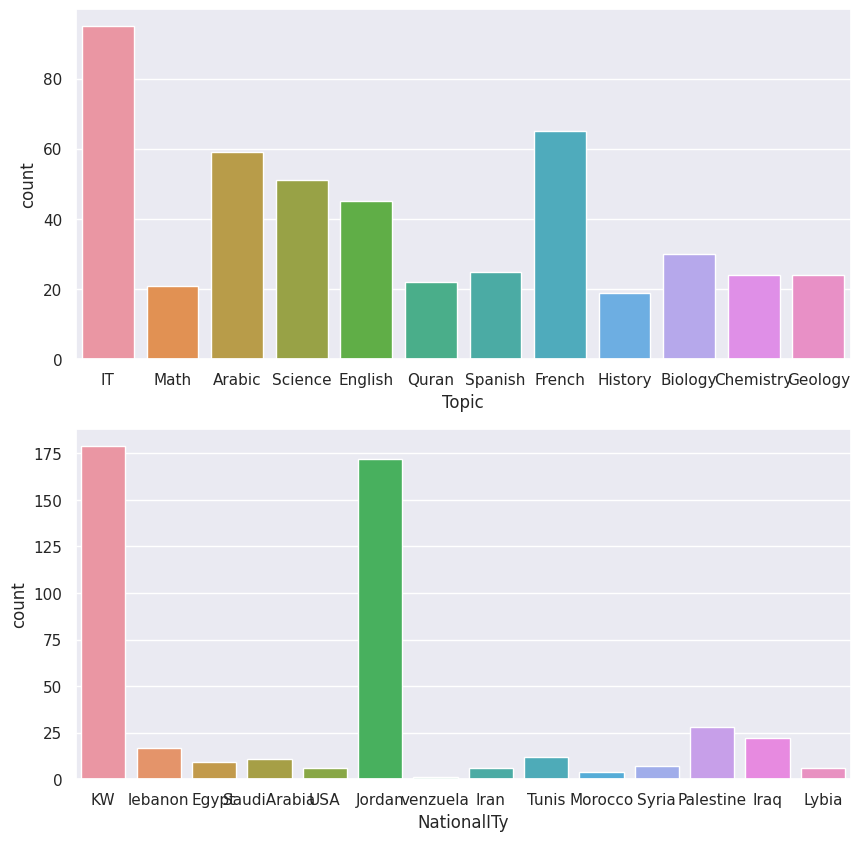

In [ ]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', data=data, ax=axis1)
sns.countplot(x='NationalITy', data=data, ax=axis2)

<Axes: xlabel='gender', ylabel='count'>

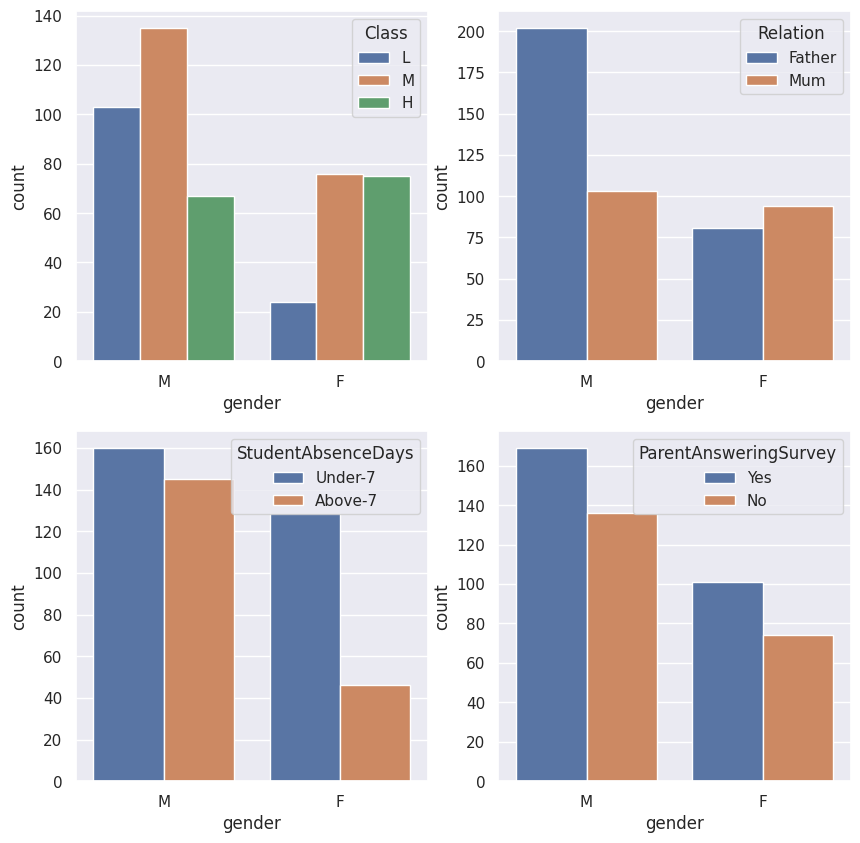

In [ ]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='gender', hue='Class', data=data, ax=axarr[0,0], order=['M','F'], hue_order=['L','M','H'])
sns.countplot(x='gender', hue='Relation', data=data, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='gender', hue='StudentAbsenceDays', data=data, ax=axarr[1,0], order=['M','F'])
sns.countplot(x='gender', hue='ParentAnsweringSurvey', data=data, ax=axarr[1,1], order=['M','F'])

<Axes: xlabel='NationalITy', ylabel='count'>

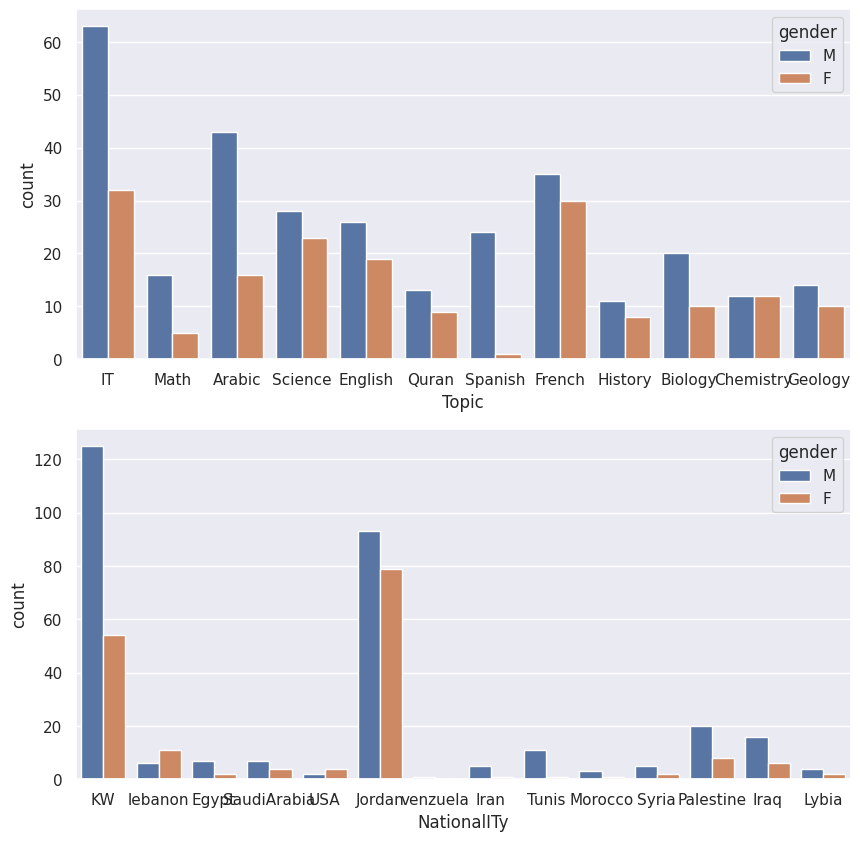

In [ ]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', hue='gender', data=data, ax=axis1)
sns.countplot(x='NationalITy', hue='gender', data=data, ax=axis2)

<Axes: xlabel='Class', ylabel='Discussion'>

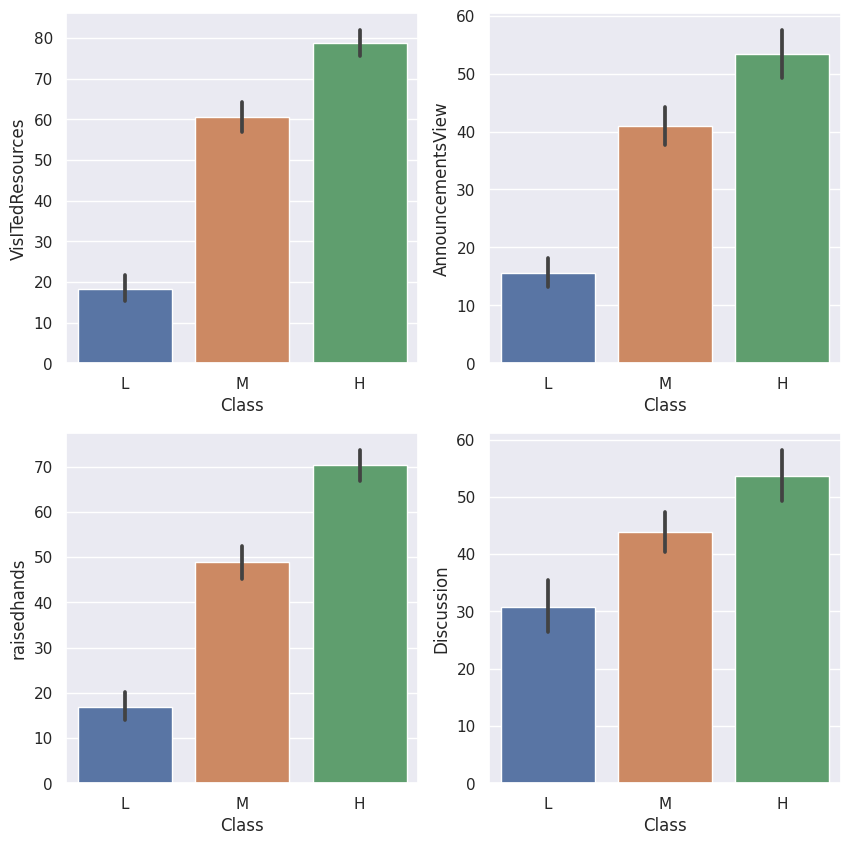

In [ ]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisITedResources', data=data, order=['L','M','H'], ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=data, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='raisedhands', data=data, order=['L','M','H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=data, order=['L','M','H'], ax=axarr[1,1])

<Axes: xlabel='Semester', ylabel='AnnouncementsView'>

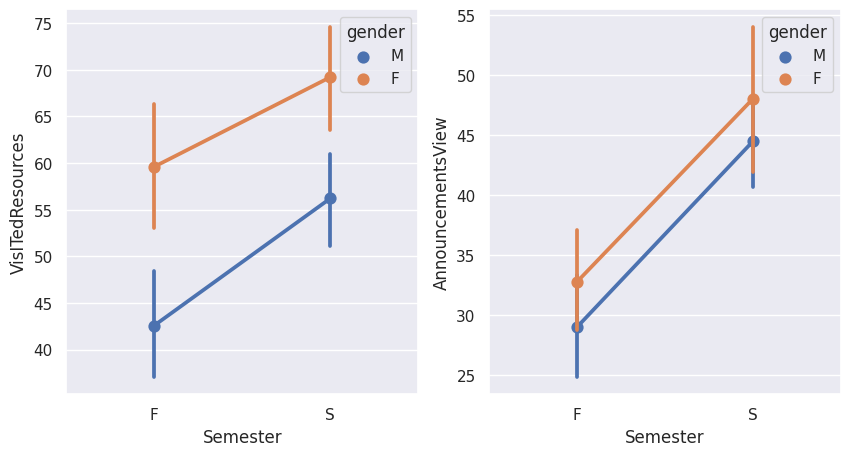

In [ ]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='Semester', y='VisITedResources', hue='gender', data=data, ax=axis1)
sns.pointplot(x='Semester', y='AnnouncementsView', hue='gender', data=data, ax=axis2)

In [ ]:
ave_raisedhands = sum(data['raisedhands'])/len(data['raisedhands'])
ave_VisITedResources = sum(data['VisITedResources'])/len(data['VisITedResources'])
ave_AnnouncementsView = sum(data['AnnouncementsView'])/len(data['AnnouncementsView'])
unsuccess = data.loc[(data['raisedhands'] >= ave_raisedhands) & (data['VisITedResources']>=ave_VisITedResources) & (data['AnnouncementsView']>=ave_AnnouncementsView)  & (data['Class'] == 'L')]


In [ ]:
unsuccess

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
444,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,75,72,64,39,Yes,Good,Above-7,L
445,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,72,76,66,40,Yes,Good,Above-7,L


In [ ]:
data['numeric_class'] = [1 if data.loc[i,'Class'] == 'L' else 2 if data.loc[i,'Class'] == 'M' else 3 for i in range(len(data))]

In [ ]:
grade_male_ave = sum(data[data.gender == 'M'].numeric_class)/float(len(data[data.gender == 'M']))
grade_female_ave = sum(data[data.gender == 'F'].numeric_class)/float(len(data[data.gender == 'F']))

Jordan average: 2.0930232558139537


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'KW'),
  Text(1, 0, 'lebanon'),
  Text(2, 0, 'Egypt'),
  Text(3, 0, 'SaudiArabia'),
  Text(4, 0, 'USA'),
  Text(5, 0, 'Jordan'),
  Text(6, 0, 'venzuela'),
  Text(7, 0, 'Iran'),
  Text(8, 0, 'Tunis'),
  Text(9, 0, 'Morocco'),
  Text(10, 0, 'Syria'),
  Text(11, 0, 'Palestine'),
  Text(12, 0, 'Iraq'),
  Text(13, 0, 'Lybia')])

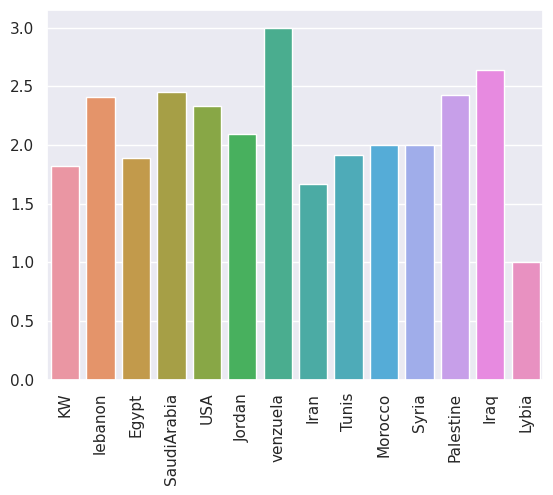

In [ ]:
# Now lets look at nationality
nation = data.NationalITy.unique()
nation_grades_ave = [sum(data[data.NationalITy == i].numeric_class)/float(len(data[data.NationalITy == i])) for i in nation]
ax = sns.barplot(x=nation, y=nation_grades_ave)
jordan_ave = sum(data[data.NationalITy == 'Jordan'].numeric_class)/float(len(data[data.NationalITy == 'Jordan']))
print('Jordan average: '+str(jordan_ave))
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Relation with father or mother affects success of students')

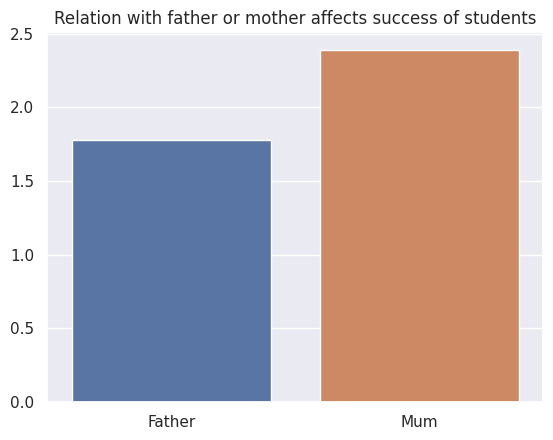

In [ ]:
# Lets look at relation with family members
relation = data.Relation.unique()
relation_grade_ave = [sum(data[data.Relation == i].numeric_class)/float(len(data[data.Relation == i])) for i in relation]
ax = sns.barplot(x=relation, y=relation_grade_ave)
plt.title('Relation with father or mother affects success of students')

Text(0.5, 1.0, 'Discussion group participation')

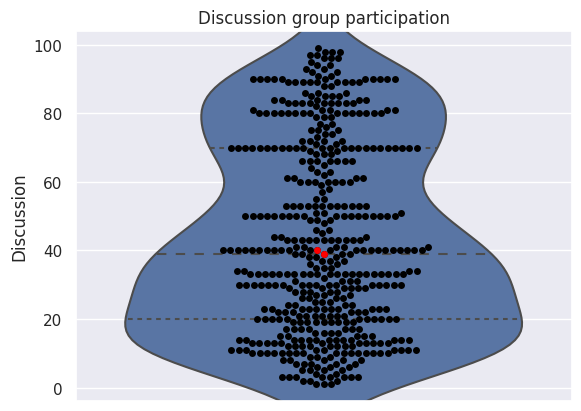

In [ ]:
#Lets look at how many times the student participate on discussion groups
discussion = data.Discussion
discussion_ave = sum(discussion)/len(discussion)
ax = sns.violinplot(y=discussion,split=True,inner='quart')
ax = sns.swarmplot(y=discussion,color='black')
ax = sns.swarmplot(y = unsuccess.Discussion, color='red')
plt.title('Discussion group participation')


Text(0.5, 1.0, 'Absence effect on success')

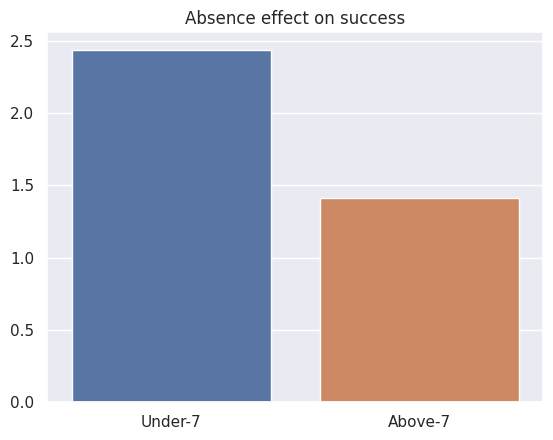

In [ ]:
# Now lastly lets look at
absence_day = data.StudentAbsenceDays.unique()
absense_day_ave = [sum(data[data.StudentAbsenceDays == i].numeric_class)/float(len(data[data.StudentAbsenceDays == i])) for i in absence_day]
ax = sns.barplot(x=absence_day, y=absense_day_ave)
plt.title('Absence effect on success')

In [ ]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,numeric_class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,2
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,2
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,2


In [ ]:
data1 = data.drop('Class',axis = 1)
data_with_dummies = pd.get_dummies(data1, drop_first=True)

In [ ]:
data_with_dummies.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,numeric_class,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,2,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,2,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
2,10,7,0,30,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,30,25,5,35,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,40,50,12,50,2,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
Features = data_with_dummies.drop(['numeric_class'],axis = 1)
Target = data_with_dummies['numeric_class']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Features)


StandardScaler()

In [ ]:
X = scaler.fit_transform(Features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Target, test_size=0.3, random_state=45)

In [ ]:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [ ]:
Prediction


array([2, 2, 3, 1, 1, 1, 1, 3, 2, 2, 2, 3, 2, 2, 1, 1, 1, 2, 1, 1, 3, 3,
       2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 1, 3, 2, 1,
       2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 3, 2, 1, 2, 2, 3, 2, 3, 3, 3, 3,
       2, 3, 2, 1, 2, 1, 3, 3, 2, 3, 2, 3, 2, 1, 2, 1, 2, 2, 3, 2, 2, 1,
       3, 2, 2, 3, 2, 2, 2, 2, 1, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3,
       3, 3, 2, 1, 1, 1, 3, 2, 2, 1, 2, 2])

In [ ]:
Score

0.7361111111111112

In [ ]:
print(Report)

              precision    recall  f1-score   support

           1       0.76      0.87      0.81        30
           2       0.78      0.70      0.74        74
           3       0.65      0.70      0.67        40

    accuracy                           0.74       144
   macro avg       0.73      0.76      0.74       144
weighted avg       0.74      0.74      0.74       144

